### Question 1

Use the techniques you learned in class to solve this problem.

(a) Zoo Animal Classification data set will be used in this problem. Load the data set from below link.<br>
https://www.kaggle.com/uciml/zoo-animal-classification

In [12]:
import pandas as pd
df_class = pd.read_csv("class.csv")
df_zoo = pd.read_csv("zoo.csv")

df_zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


(b) List target names and feature names of Zoo Animal Classification dataset.

In [13]:
# feature names
print(df_zoo.columns.values[:-1])

print("\n")

#target names
df_class_nt = df_class.loc[:, ["Class_Number", "Class_Type"]]
print(df_class_nt)

['animal_name' 'hair' 'feathers' 'eggs' 'milk' 'airborne' 'aquatic'
 'predator' 'toothed' 'backbone' 'breathes' 'venomous' 'fins' 'legs'
 'tail' 'domestic' 'catsize']


   Class_Number    Class_Type
0             1        Mammal
1             2          Bird
2             3       Reptile
3             4          Fish
4             5     Amphibian
5             6           Bug
6             7  Invertebrate


(c) Split your data using model selection.train test split to 80% training data and 20% test data.

In [14]:
from sklearn.model_selection import train_test_split

df_x = df_zoo.iloc[:,1:-1]
df_y = df_zoo.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2)



(d)  Use appropriate model and train with the training data set. Test your trained model on the test data set and classify the values of the samples in the test data set.

In [15]:
from sklearn.linear_model import LogisticRegression

#train
model = LogisticRegression(max_iter=1000, multi_class = 'multinomial',solver='lbfgs')
model.fit(x_train, y_train.values.ravel())

#test
y_pred = model.predict(x_test)

(f) Calculate the accuracy and plot Confusion Matrix.
 <br>

0.9523809523809523
[[13  0  0  0  0  0]
 [ 0  3  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  2]]


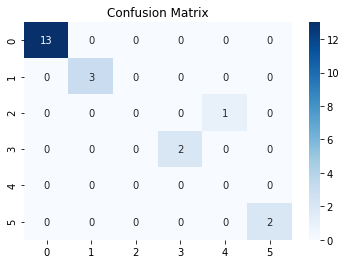

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 10}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

(e) Write your comments about the confusion matrix of your experiment.

In [17]:
# The model I used perfectly predicted right answer.

### Question 2

The handwritten digit data set MNIST is a subset of NIST, which can be used for simple implementation of machine learning algorithms. In this problem, you will use support vector machine to finish the classification of MNIST. <br>
https://www.kaggle.com/c/digit-recognizer/data

(a) Load the first 10K samples from "train.csv" and split them into training and testing data by 0.2. Use sklearn.svm to train a model with raw pixel features. Choose the linear kernel and set C = 5 and gamma= 0.05. Report the model.

In [18]:
df_train = pd.read_csv("train.csv", nrows=10000)
df_y = df_train.iloc[:,0:1]
df_x = df_train.iloc[:,1:] 

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=109)
from sklearn import svm

_svc = svm.SVC(kernel='linear',C=5,gamma=0.05)
_svc.fit(x_train, y_train.values.ravel())
_svc_y_pred = _svc.predict(x_test)

(b) How many support vectors does each class have? List the support vectors for each class and test the prediction accuracy by metrics.classification report.

In [19]:
print("support vector number: {0}".format(_svc.support_vectors_.shape[0]))
print(y_test.nunique())  

from sklearn.metrics import classification_report
print(classification_report(y_test, _svc_y_pred.ravel(), target_names=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10']))

support vector number: 2295
label    10
dtype: int64
              precision    recall  f1-score   support

          c1       0.97      0.97      0.97       203
          c2       0.94      0.97      0.95       227
          c3       0.90      0.93      0.92       187
          c4       0.91      0.89      0.90       211
          c5       0.85      0.96      0.90       181
          c6       0.88      0.91      0.90       184
          c7       0.95      0.95      0.95       197
          c8       0.92      0.93      0.92       205
          c9       0.93      0.81      0.86       192
         c10       0.91      0.84      0.87       213

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.91      2000
weighted avg       0.92      0.92      0.92      2000



(c) Repeat (a) and (b) with a RBF kernel and the same C and gamma.

In [20]:
nl_svc = svm.SVC(kernel='rbf',C=5,gamma=0.05)
nl_svc.fit(x_train, y_train.values.ravel())
nl_svc_y_pred = nl_svc.predict(x_test)

In [21]:
print("support vector number: {0}".format(nl_svc.support_vectors_.shape[0]))
print(y_test.nunique())
print(set(y_test)-set(nl_svc_y_pred))
print(classification_report(y_test, nl_svc_y_pred.ravel(), target_names=['c1','c2','c3','c4','c5','c6','c7','c8','c9','c10'], zero_division=1))


support vector number: 8000
label    10
dtype: int64
{'label'}
              precision    recall  f1-score   support

          c1       1.00      0.00      0.00       203
          c2       0.11      1.00      0.20       227
          c3       1.00      0.00      0.00       187
          c4       1.00      0.00      0.00       211
          c5       1.00      0.00      0.00       181
          c6       1.00      0.00      0.00       184
          c7       1.00      0.00      0.00       197
          c8       1.00      0.00      0.00       205
          c9       1.00      0.00      0.00       192
         c10       1.00      0.00      0.00       213

    accuracy                           0.11      2000
   macro avg       0.91      0.10      0.02      2000
weighted avg       0.90      0.11      0.02      2000



(d) Compare the two models and comment on the results.

In [22]:
'''
Training a SVM with a Linear Kernel is Faster than with any other Kernel. Kernel Function generally transforms the training set of data 
so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. 
Basically, It returns the inner product between two points in a standard feature dimension.
Kernel Function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n then find the dot product in higher dimensional efficiently.

Precision=TP/TP+FP
Recall=TP/TP+FN

According to the report of both models on this data,
Linear model reported high precision and recall, which means linear model works well.
However, rbf model reported high precision and low recall, 
which means it predicted accurately only about what they predicted as positive but it looks not predict well among total test.

'''

'\nTraining a SVM with a Linear Kernel is Faster than with any other Kernel. Kernel Function generally transforms the training set of data \nso that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces. \nBasically, It returns the inner product between two points in a standard feature dimension.\nKernel Function is used to transform n-dimensional input to m-dimensional input, where m is much higher than n then find the dot product in higher dimensional efficiently.\n\nPrecision=TP/TP+FP\nRecall=TP/TP+FN\n\nAccording to the report of both models on this data,\nLinear model reported high precision and recall, which means linear model works well.\nHowever, rbf model reported high precision and low recall, \nwhich means it predicted accurately only about what they predicted as positive but it looks not predict well among total test.\n\n'